In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.09 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.10 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.12 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [11]:
#Initialize working variables
intercept = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)

In [12]:
#sigmoid function,scores(z)=W.X+b
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))


#Log loss function
def compute_log_loss(y_train,predictions):
    calc=0.0
    output=0.0
    a=0.0
    b=0.0
    a=(y_train)*(np.log(predictions))
    b=(1-(y_train))*(np.log(1-predictions))
    calc=-(a+b)
    return calc

#logistic regression function which updates weight and intercept and calculates train and test loss
def logistic_regression(X_train, y_train,X_test,y_test,epoc, num_steps, alpha, add_intercept = False):
    if add_intercept:
        weights = np.zeros(X_train.shape[1])
        intercept=0
    train_loss_lst=[]
    test_loss_lst=[]
    for i in tqdm(range(epoc)):
        train_loss=0
        test_loss=0
        for step in range(num_steps):
            scores = np.dot(X_train[step],weights.T) +intercept
            predictions = sigmoid(scores)            
            # Update weights with gradient,scores 
            output_error_signal = y_train[step] - predictions   
            gradient = np.dot(X_train[step].T, output_error_signal)    
            weights1=alpha*gradient
            k=(1-((alpha*eta0)/N))
            weights = k*weights+weights1
            intercept+= (alpha * output_error_signal)
            train_loss+=compute_log_loss(y_train[step],predictions)
        for step1 in range(len(X_test)):
            scores_test = np.dot(X_test[step1],weights.T) +intercept
            predictions_test = sigmoid(scores_test)
            test_loss+=compute_log_loss(y_test[step1],predictions_test)
            
        train_loss_avg=train_loss/len(X_train)
        train_loss_lst.append(train_loss_avg)
        test_loss_avg=test_loss/len(X_test)
        test_loss_lst.append(test_loss_avg)
    return weights,train_loss_lst,test_loss_lst,intercept

In [13]:
from tqdm import tqdm
epoc=10
train_loss_lst=[]
test_loss_lst=[]
intercept=[]
weights,train_loss_lst,test_loss_lst,intercept = logistic_regression(X_train, y_train,X_test,y_test,epoc,N, 0.0001, add_intercept=True)

print("Weights:\n {}\n".format(weights))
print("Train log loss:\n {}\n".format(train_loss_lst))
print("Test_log_loss:\n {}\n".format(test_loss_lst))
print("Intercept: \n {}".format(intercept))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.07s/it]


Weights:
 [-0.42320236  0.19097504 -0.14588903  0.33813461 -0.21204107  0.56528021
 -0.44537758 -0.09169276  0.21798654  0.16980147  0.19524869  0.00226123
 -0.0778474   0.33881857  0.02215503]

Train log loss:
 [0.4561071561222095, 0.3946913054134678, 0.38558684615141386, 0.3820332220716298, 0.3803505534286812, 0.37948877552910604, 0.3790295733085737, 0.37877935873421104, 0.37864115328130576, 0.37856414391899257]

Test_log_loss:
 [0.4051507711105085, 0.3900563342346349, 0.38500584031391927, 0.3827291962470263, 0.38158346823458383, 0.38097553123399935, 0.3806434506916475, 0.38045882555929006, 0.3803549569881217, 0.3802960051315842]

Intercept: 
 -0.8505912797715786


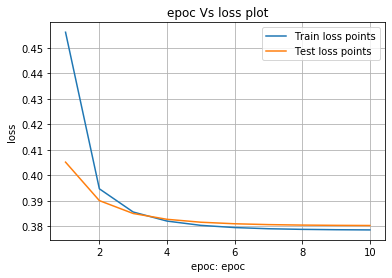

In [14]:
epoc=np.arange(1,11)
plt.plot(epoc,train_loss_lst,label='Train loss points')  
plt.plot(epoc,test_loss_lst,label='Test loss points') 
plt.legend() 
plt.xlabel("epoc: epoc")
plt.ylabel("loss") 
plt.title("epoc Vs loss plot") 
plt.grid() 
plt.show() 

In [15]:
weights-clf.coef_

array([[ 0.00016455,  0.00549939,  0.00270133, -0.00330946, -0.00385437,
         0.00511442,  0.00704724,  0.00239537,  0.00871335, -0.01103979,
        -0.00180322, -0.00195793,  0.0017563 ,  0.00029055, -0.00051218]])

In [16]:
intercept-clf.intercept_

array([0.00254702])